<h1>ATIVIDADE PRÁTICA 01 - Processamento de Linguagem Natural</h1>

<h3>A atividade será realizada conforme os passos do seguinte roteiro: </h3>
<ul>
    <p>a) Usar o NLTK e o pacote Beautiful Soup para acessar uma página na Web em língua inglesa e extrair o texto de interesse.</p>
    <p>b) Realizar a tokenização do texto obtido e verificar quais são os 20 tokens mais frequentes. Faça um gráfico (histograma, gráfico de frequências ou até mesmo uma nuvem de palavras) mostrando o resultado.</p>
    <p>c) Eliminar as stopwords do resultado do item b) e verificar quais são os 20 tokens mais frequentes no resultado. Faça um gráfico (histograma, gráfico de frequências ou até mesmo uma nuvem de palavras) mostrando o resultado.</p>
    <p>d) Realizar a lematização dos resultados dos itens b) e c). Verificar quais são os 20 tokens mais frequentes em cada caso e fazer os respectivos gráficos (histograma, gráfico de frequências ou até mesmo uma nuvem de palavras).</p>
    <p>e) Repita o item d) realizando o stemming ao invés da lematização.</p>
</ul>

<h3>Os textos escolhidos foram os discursos de posse dos últimos dois presidentes dos EUA, Donald Trump e Joe Biden, as páginas de onde os textos serão extraídos podem ser acessadas pelos links a seguir:</h3>
<ul>
    <p><a href="https://trumpwhitehouse.archives.gov/briefings-statements/the-inaugural-address/">Donald Trump</a> </p>
    <p><a href="https://www.whitehouse.gov/briefing-room/speeches-remarks/2021/01/20/inaugural-address-by-president-joseph-r-biden-jr/">Joe Biden</a></p>
</ul>


# Importações

In [1]:
#!pip install nltk
#!pip install bs4
#!pip install requests
#!pip install wordcloud
#!pip install matplotlib

In [2]:
from bs4 import BeautifulSoup
import requests

from nltk import word_tokenize,download,stem
from nltk.corpus import stopwords
download(['punkt', 'averaged_perceptron_tagger', 'stopwords', 'wordnet'])
from nltk.stem.wordnet import WordNetLemmatizer

import re
from collections import Counter

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /home/jr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jr/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/jr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h1>Passo a) - Extração de dados</h1>

Utilizando a biblioteca BeautifulSoup extraímos os textos das páginas mostradas anteriormente (realizando pequenas modificações necessárias para se obter o texto desejado). Após extrair os textos, cada discurso é impresso na tela.

In [3]:
url_trump = "https://trumpwhitehouse.archives.gov/briefings-statements/the-inaugural-address/"

html_content_trump = requests.get(url_trump)
html_content_trump.raise_for_status()

soup_trump = BeautifulSoup(html_content_trump.text, "html.parser")
page_content_trump = soup_trump.find('div', {"class":"page-content__wrap"})
p_elems_t = page_content_trump.find_all('p')

speech_trump = ''
for p in p_elems_t[2:]:
    speech_trump += p.text + '\n' 

print(speech_trump)

Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: thank you.
We, the citizens of America, are now joined in a great national effort to rebuild our country and to restore its promise for all of our people.
Together, we will determine the course of America and the world for years to come.
We will face challenges. We will confront hardships. But we will get the job done.
Every four years, we gather on these steps to carry out the orderly and peaceful transfer of power, and we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent.
Today’s ceremony, however, has very special meaning. Because today we are not merely transferring power from one Administration to another, or from one party to another – but we are transferring power from Washington, D.C. and giving it back to you, the American People.
For too long, a small gr

In [4]:
url_biden = "https://www.whitehouse.gov/briefing-room/speeches-remarks/2021/01/20/inaugural-address-by-president-joseph-r-biden-jr/"
html_content_biden = requests.get(url_biden)
html_content_biden.raise_for_status()

soup_biden = BeautifulSoup(html_content_biden.text, "html.parser")
page_content_biden = soup_biden.find("section").find("div", {"class":"container"})
p_elems_b = page_content_biden.find_all('p')
speech_biden = ''
for p in p_elems_b[2:-2]:
    speech_biden += p.text + '\n'
speech_biden = speech_biden.replace("THE PRESIDENT: ", "")

print(speech_biden)

Chief Justice Roberts, Vice President Harris, Speaker Pelosi, Leader Schumer, Leader McConnell, Vice President Pence, distinguished guests, and my fellow Americans.
This is America’s day.
This is democracy’s day.
A day of history and hope.
Of renewal and resolve.
Through a crucible for the ages America has been tested anew and America has risen to the challenge.
Today, we celebrate the triumph not of a candidate, but of a cause, the cause of democracy.
The will of the people has been heard and the will of the people has been heeded.
We have learned again that democracy is precious.
Democracy is fragile.
And at this hour, my friends, democracy has prevailed.
So now, on this hallowed ground where just days ago violence sought to shake this Capitol’s very foundation, we come together as one nation, under God, indivisible, to carry out the peaceful transfer of power as we have for more than two centuries.
We look ahead in our uniquely American way – restless, bold, optimistic – and set our

<h1>Passo b) - Tokenização sem modificar o texto</h1>

Extraímos os tokens do texto sem modificar o texto de forma alguma, desta maneira ainda teremos sinais de pontuação e stopwords dentre os tokens mais frequentes.

O método get_frequencies() é definido abaixo, este método é utilizado para coletar os 20 tokens mais frequentes no texto e será utilizado ao longo da atividade.

In [5]:
def get_frequencies(tokens):
    return Counter(" ".join(tokens).split()).most_common(20)

A tokenização é realizada utilizando a biblioteca NLTK e pode ser observada abaixo. Os 20 tokens mais frequentes de cada discurso são impressos na próxima célula.

In [6]:
speech_t_tokens = word_tokenize(speech_trump)
print("Tokens do discurso de Trump (sem modificações):\n")
print(speech_t_tokens)

print("\n")

speech_b_tokens = word_tokenize(speech_biden)
print("Tokens do discurso de Biden (sem modificações):\n")
print(speech_b_tokens)

Tokens do discurso de Trump (sem modificações):

['Chief', 'Justice', 'Roberts', ',', 'President', 'Carter', ',', 'President', 'Clinton', ',', 'President', 'Bush', ',', 'President', 'Obama', ',', 'fellow', 'Americans', ',', 'and', 'people', 'of', 'the', 'world', ':', 'thank', 'you', '.', 'We', ',', 'the', 'citizens', 'of', 'America', ',', 'are', 'now', 'joined', 'in', 'a', 'great', 'national', 'effort', 'to', 'rebuild', 'our', 'country', 'and', 'to', 'restore', 'its', 'promise', 'for', 'all', 'of', 'our', 'people', '.', 'Together', ',', 'we', 'will', 'determine', 'the', 'course', 'of', 'America', 'and', 'the', 'world', 'for', 'years', 'to', 'come', '.', 'We', 'will', 'face', 'challenges', '.', 'We', 'will', 'confront', 'hardships', '.', 'But', 'we', 'will', 'get', 'the', 'job', 'done', '.', 'Every', 'four', 'years', ',', 'we', 'gather', 'on', 'these', 'steps', 'to', 'carry', 'out', 'the', 'orderly', 'and', 'peaceful', 'transfer', 'of', 'power', ',', 'and', 'we', 'are', 'grateful', 'to'

In [7]:
word_frequency_t1 = get_frequencies(speech_t_tokens)
print("20 tokens mais frequentes no discurso de Trump (sem modificações):\n")
print(word_frequency_t1)

print('\n')

word_frequency_b1 = get_frequencies(speech_b_tokens)
print("20 tokens mais frequentes no discurso de Biden (sem modificações):\n")
print(word_frequency_b1)

20 tokens mais frequentes no discurso de Trump (sem modificações):

[(',', 95), ('.', 86), ('and', 66), ('the', 64), ('of', 48), ('our', 47), ('to', 37), ('will', 35), ('We', 28), ('we', 21), ('is', 21), ('America', 18), ('are', 14), ('a', 14), ('in', 13), ('for', 13), ('all', 12), ('American', 12), ('be', 12), ('not', 11)]


20 tokens mais frequentes no discurso de Biden (sem modificações):

[('.', 204), (',', 147), ('the', 92), ('and', 76), ('of', 71), ('we', 62), ('to', 61), ('our', 42), ('in', 40), ('a', 39), ('this', 34), ('for', 32), ('I', 32), ('will', 30), ('is', 29), ('We', 29), ('us', 27), ('’', 26), ('be', 21), ('have', 20)]


Definimos os métodos generate_histogram() e generate_wordcloud()  que serão utilizados para gerar histogramas e wordclouds durante essa atividade.

In [8]:
def generate_histogram(title, word_frequency):
    words = [word for word, _ in word_frequency]
    counts = [counts for _, counts in word_frequency]
    
    figure(figsize=(20, 10))
    plt.bar(words, counts)
    plt.title(title)
    plt.ylabel("Frequencia")
    plt.xlabel("Tokens")
    plt.show()
    
def generate_wordcloud(stopwords, word_frequency):
    wordcloud_t1 = WordCloud(
        max_words=20,
        width = 1300,
        height = 700,
        background_color = 'white',
        stopwords = stopwords,
    ).generate_from_frequencies(dict(word_frequency))
    
    plt.figure(figsize = (15, 7), facecolor = None)
    plt.imshow(wordcloud_t1)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

Utilizando os métodos definidos acima, geramos um histograma e wordcloud para os 20 tokens mais frequentes de cada discurso.

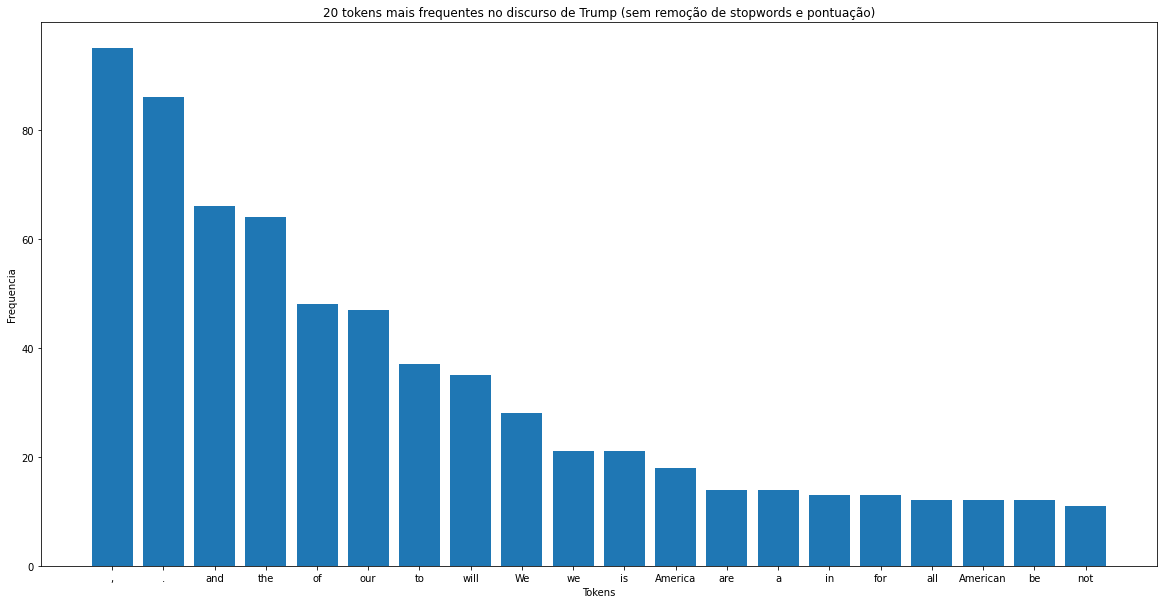

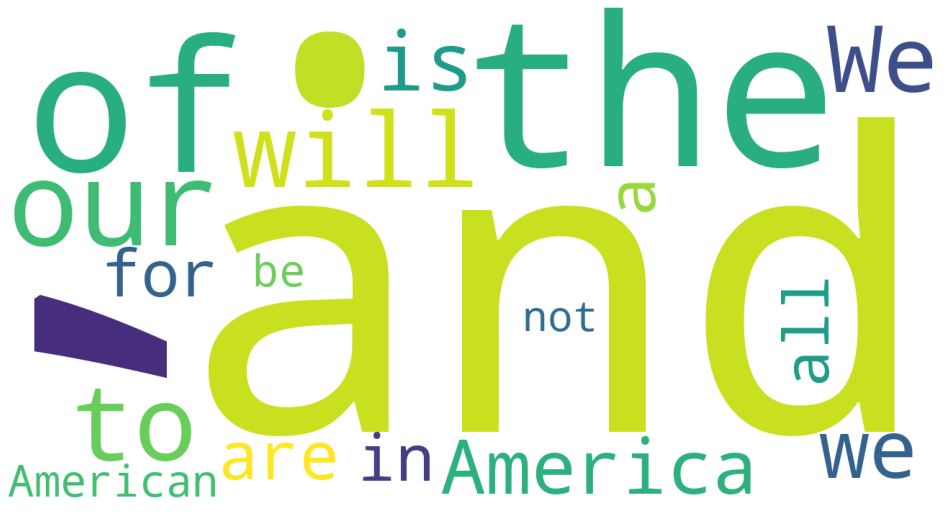

In [9]:
title = "20 tokens mais frequentes no discurso de Trump (sem remoção de stopwords e pontuação)"
generate_histogram(title, word_frequency_t1)
generate_wordcloud(None, word_frequency_t1)

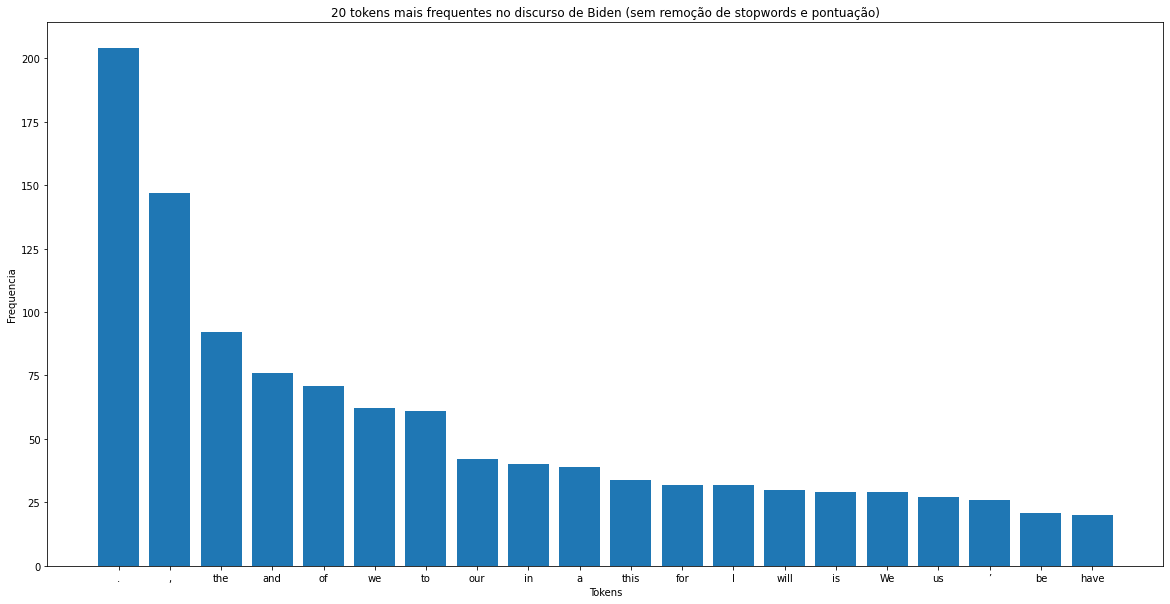

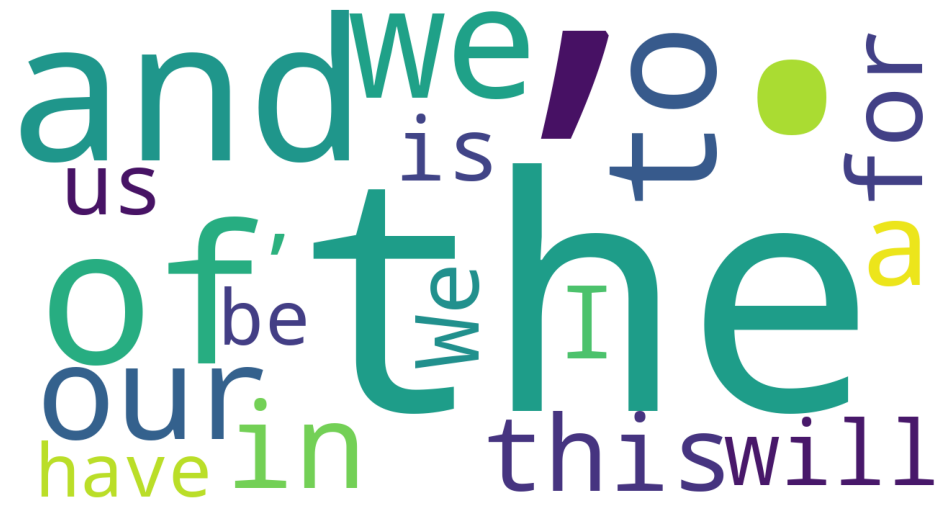

In [10]:
title = "20 tokens mais frequentes no discurso de Biden (sem remoção de stopwords e pontuação)"
generate_histogram(title, word_frequency_b1)
generate_wordcloud(None, word_frequency_b1)

<h1>Passo c) - Tokenização com remoção das stopwords</h1>

Definimos o método normalize() que será utilizado para normalizar o texto (de forma básica), transformando todos os caracteres do texto na forma minúscula, removendo as stopwords utilizando dados da biblioteca nltk e removendo sinais de pontuação.

In [11]:
def normalize(text):
    stop_words = stopwords.words('english')
    punct = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower().split()
    text = ' '.join([word for word in text if word not in stop_words])
    return text

O processo do passo b) é repetido, porém desta vez o método normalize() é utilizado sobre o texto antes de realizar a tokenização. Assim, obteremos os tokens de ambos os discursos desconsiderando sinais de pontuação, stopwords e capitalização de palavras. O processo descrito pode ser visto na célula abaixo, onde todos os tokens de ambos os textos são impressos, já na célula seguinte, os 20 tokens mais frequentes de cada discurso são mostrados.

In [12]:
print("Tokens do discurso de Trump (utilizando o método normalize no texto):\n")
speech_t2_tokens = word_tokenize(normalize(speech_trump))
print(speech_t2_tokens)

print("\n")

print("Tokens do discurso de Biden (utilizando o método normalize no texto):\n")
speech_b2_tokens = word_tokenize(normalize(speech_biden))
print(speech_b2_tokens)

Tokens do discurso de Trump (utilizando o método normalize no texto):

['chief', 'justice', 'roberts', 'president', 'carter', 'president', 'clinton', 'president', 'bush', 'president', 'obama', 'fellow', 'americans', 'people', 'world', 'thank', 'citizens', 'america', 'joined', 'great', 'national', 'effort', 'rebuild', 'country', 'restore', 'promise', 'people', 'together', 'determine', 'course', 'america', 'world', 'years', 'come', 'face', 'challenges', 'confront', 'hardships', 'get', 'job', 'done', 'every', 'four', 'years', 'gather', 'steps', 'carry', 'orderly', 'peaceful', 'transfer', 'power', 'grateful', 'president', 'obama', 'first', 'lady', 'michelle', 'obama', 'gracious', 'aid', 'throughout', 'transition', 'magnificent', 'todays', 'ceremony', 'however', 'special', 'meaning', 'today', 'merely', 'transferring', 'power', 'one', 'administration', 'another', 'one', 'party', 'another', 'transferring', 'power', 'washington', 'dc', 'giving', 'back', 'american', 'people', 'long', 'small', '

In [13]:
word_frequency_t2 = get_frequencies(speech_t2_tokens)

print("20 tokens mais frequentes no discurso de Trump (utilizando o método normalize no texto):\n")
print(word_frequency_t2)

print('\n')

word_frequency_b2 = get_frequencies(speech_b2_tokens)

print("20 tokens mais frequentes no discurso de Biden (utilizando o método normalize no texto):\n")
print(word_frequency_b2)

20 tokens mais frequentes no discurso de Trump (utilizando o método normalize no texto):

[('america', 17), ('american', 12), ('people', 9), ('country', 9), ('one', 8), ('every', 7), ('world', 6), ('great', 6), ('back', 6), ('nation', 6), ('never', 6), ('new', 6), ('president', 5), ('nations', 5), ('protected', 5), ('across', 5), ('right', 5), ('dreams', 5), ('make', 5), ('americans', 4)]


20 tokens mais frequentes no discurso de Biden (utilizando o método normalize no texto):

[('us', 27), ('america', 16), ('one', 15), ('nation', 12), ('democracy', 10), ('must', 10), ('americans', 9), ('people', 9), ('american', 9), ('story', 9), ('today', 8), ('know', 8), ('much', 8), ('world', 8), ('unity', 8), ('another', 8), ('president', 7), ('history', 7), ('war', 7), ('days', 6)]


Como feito anteriormente, utilizamos os métodos para gerar um histograma e wordcloud para cada conjunto de tokens de ambos os discursos.

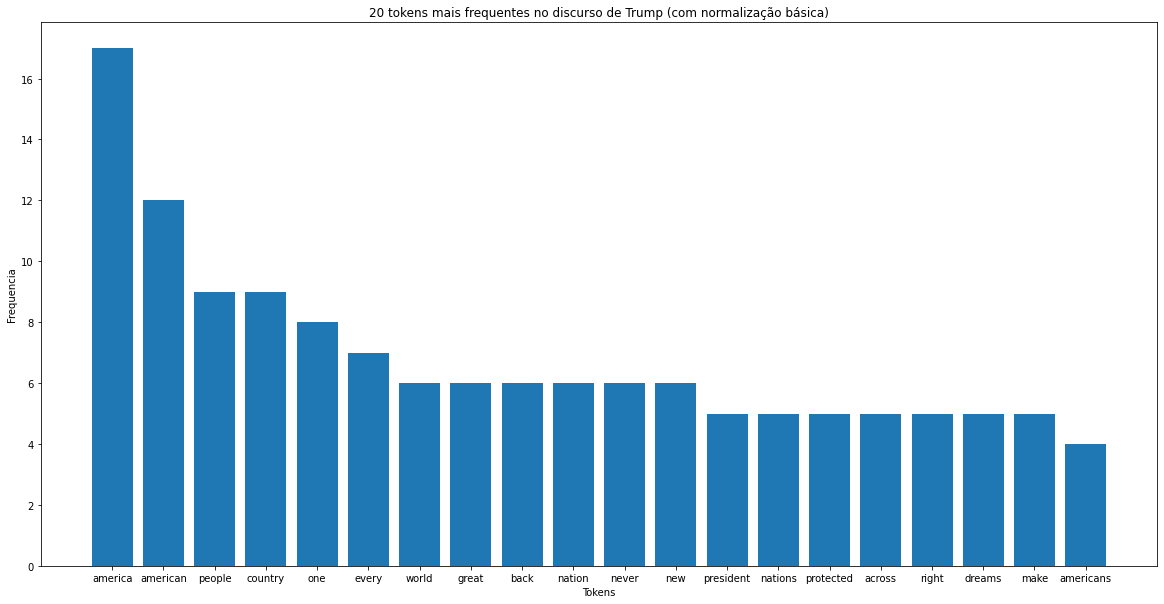

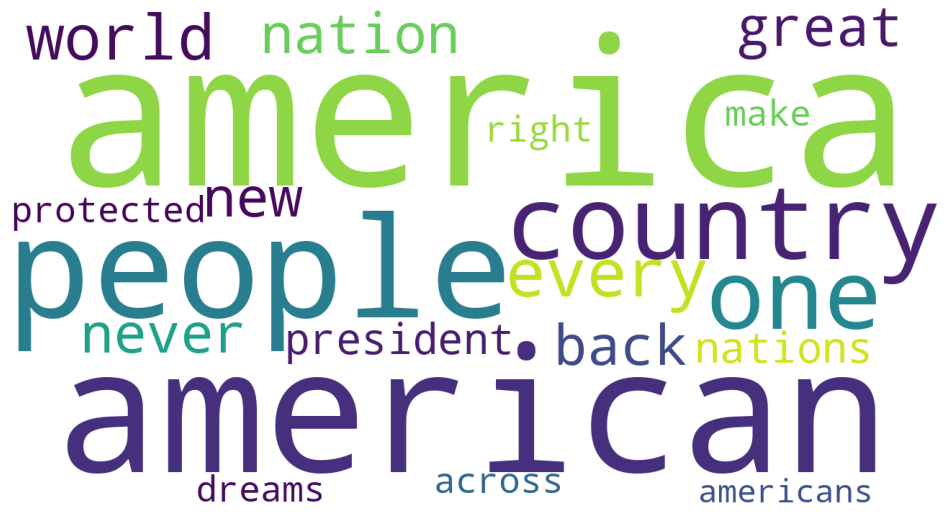

In [14]:
title = "20 tokens mais frequentes no discurso de Trump (com normalização básica)"
generate_histogram(title, word_frequency_t2)
generate_wordcloud(STOPWORDS, word_frequency_t2)

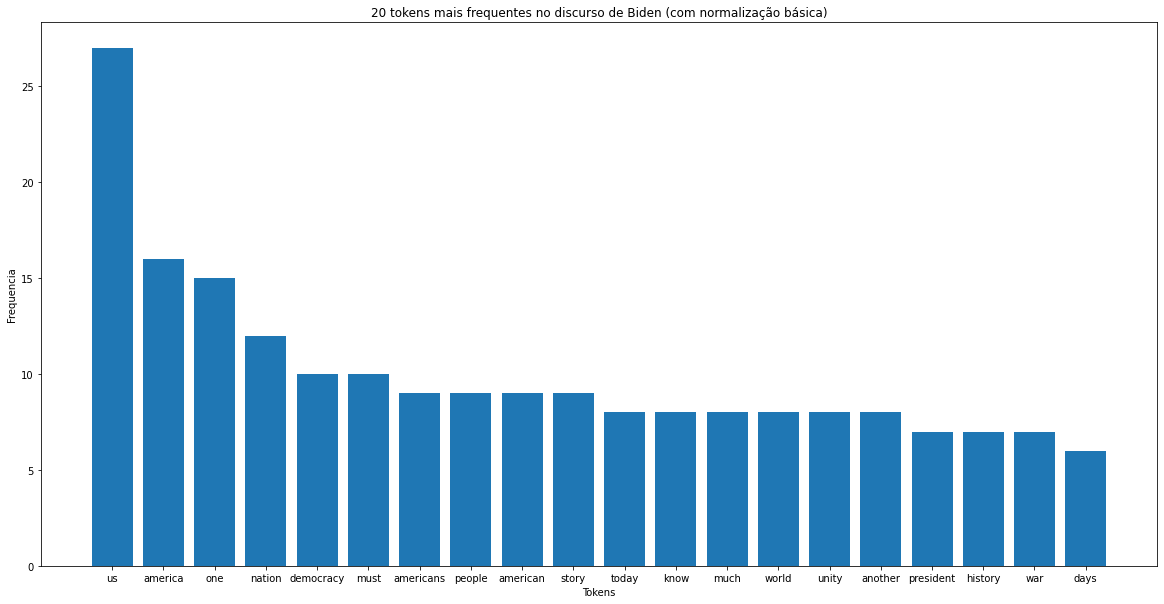

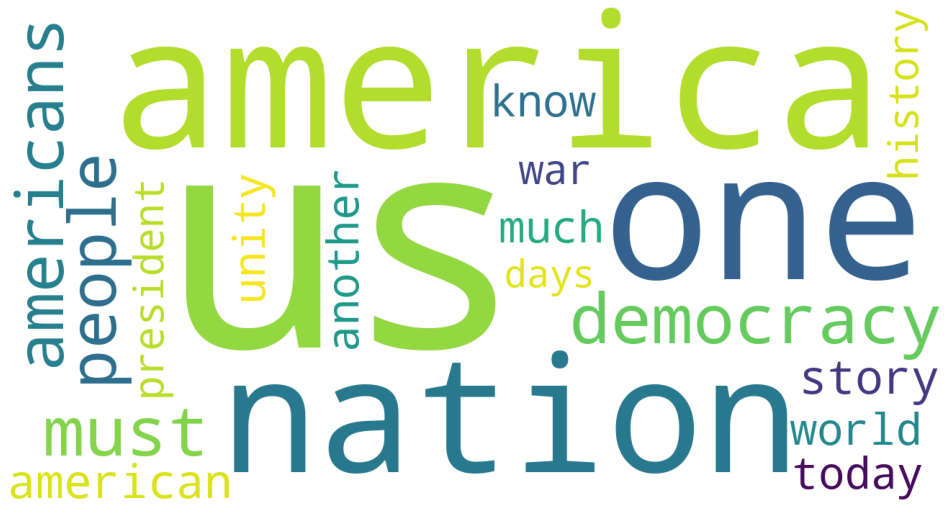

In [15]:
title = "20 tokens mais frequentes no discurso de Biden (com normalização básica)"
generate_histogram(title, word_frequency_b2)
generate_wordcloud(STOPWORDS, word_frequency_b2)

<h1>Passo d) Normalização com lematização</h1>

Definimos os métodos get_lemma() e lemmatize_text():
<ul>
    <li>get_lemma() lematiza uma única palavra</li>
    <li>lemmatize_text() lematiza todas as palavras de um texto</li>
</ul>
Neste passo, repetimos os processos do passo b) e do passo c), utilizando os métodos abaixo antes de realizar a tokenização dos textos.

In [16]:
def get_lemma(word):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

def lemmatize_text(text):
    return ' '.join([get_lemma(word) for word in text.split()])

<h2>Repetindo o processo do passo b) (lematização sem utilizar o método normalize)</h2>

In [17]:
speech_trump_lem = lemmatize_text(speech_trump)
word_frequency_t1_lem = get_frequencies(word_tokenize(speech_trump_lem))
print("20 tokens mais frequentes no discurso de Trump (Passo b) lematizado):\n")
print(word_frequency_t1_lem)

print("\n")

speech_biden_lem = lemmatize_text(speech_biden)
word_frequency_b1_lem = get_frequencies(word_tokenize(speech_biden_lem))
print("20 tokens mais frequentes no discurso de Biden (Passo b) lematizado):\n")
print(word_frequency_b1_lem)

20 tokens mais frequentes no discurso de Trump (Passo b) lematizado):

[(',', 95), ('.', 86), ('and', 66), ('the', 64), ('of', 48), ('our', 47), ('to', 37), ('will', 35), ('We', 28), ('we', 21), ('is', 21), ('America', 18), ('a', 18), ('are', 14), ('in', 13), ('for', 13), ('country', 12), ('it', 12), ('all', 12), ('American', 12)]


20 tokens mais frequentes no discurso de Biden (Passo b) lematizado):

[('.', 204), (',', 147), ('the', 92), ('and', 76), ('of', 71), ('we', 62), ('to', 61), ('a', 57), ('our', 42), ('in', 40), ('this', 34), ('for', 32), ('I', 32), ('will', 30), ('is', 29), ('We', 29), ('’', 26), ('be', 21), ('have', 20), ('And', 20)]


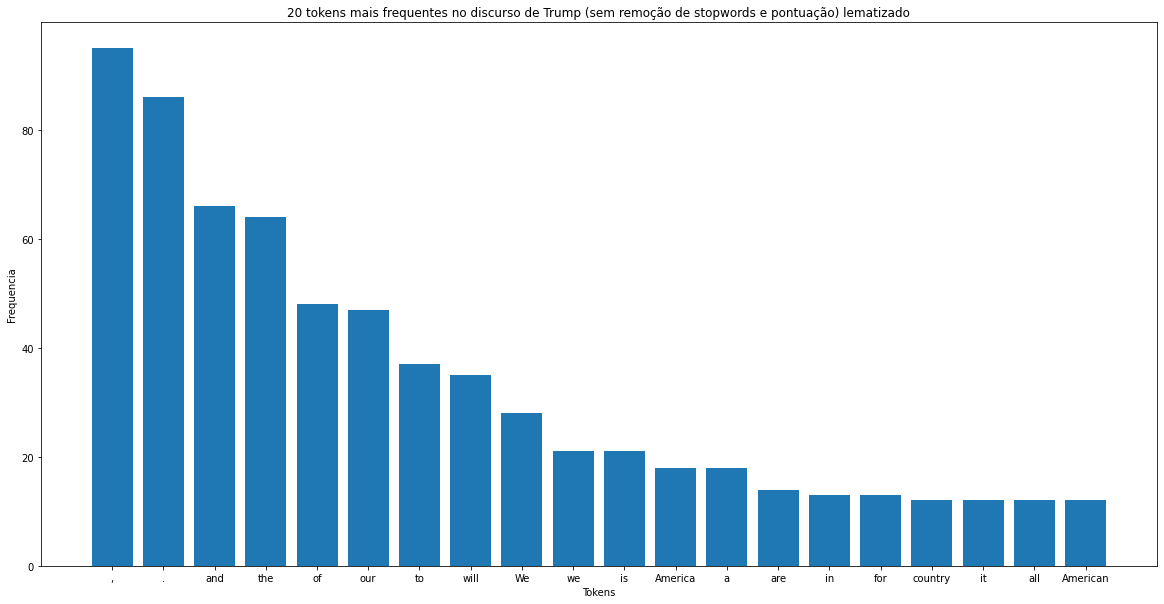

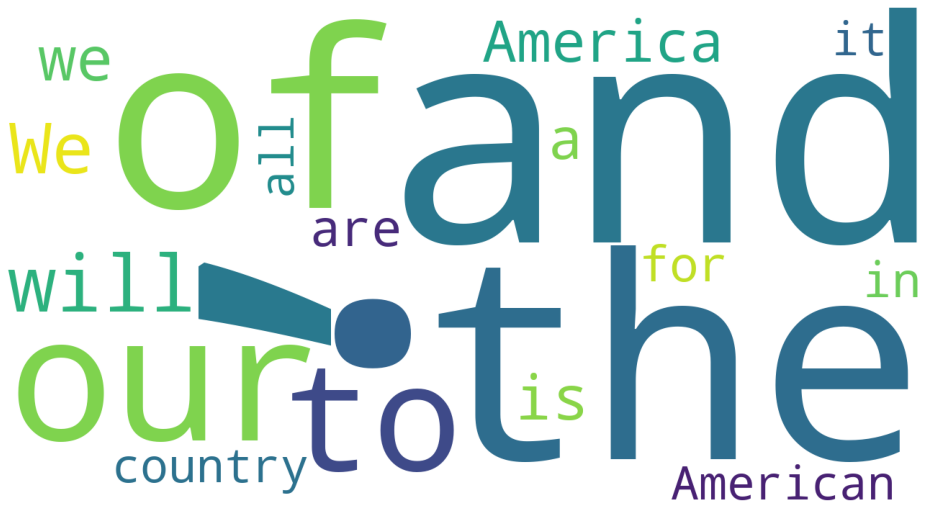

In [18]:
title = "20 tokens mais frequentes no discurso de Trump (sem remoção de stopwords e pontuação) lematizado"
generate_histogram(title, word_frequency_t1_lem)
generate_wordcloud(None, word_frequency_t1_lem)

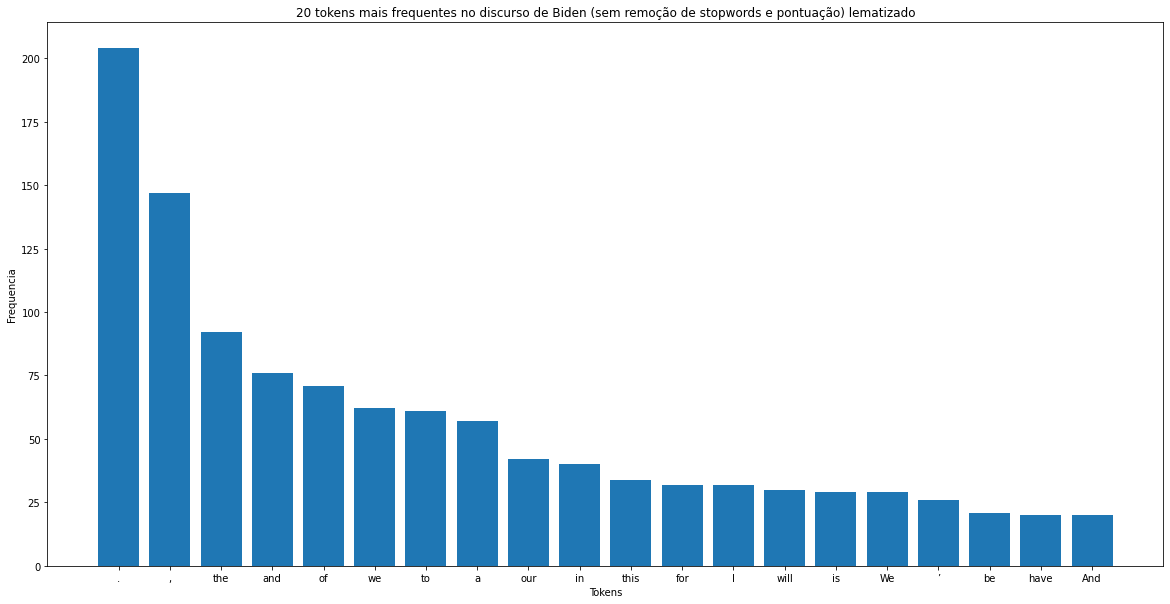

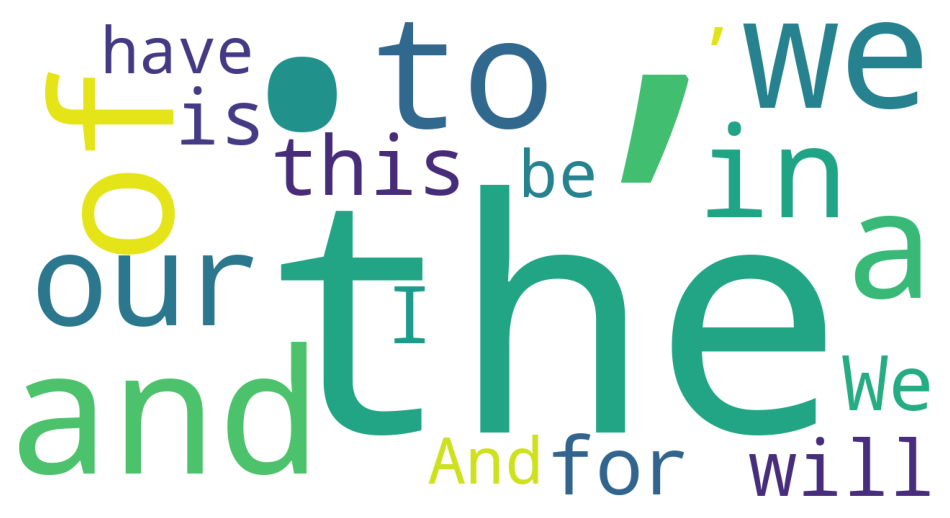

In [19]:
title = "20 tokens mais frequentes no discurso de Biden (sem remoção de stopwords e pontuação) lematizado"
generate_histogram(title, word_frequency_b1_lem)
generate_wordcloud(None, word_frequency_b1_lem)

<h2>Repetindo o processo do passo c) (lematização utilizando o método normalize)</h2>

In [20]:
speech_trump_norm_lem = lemmatize_text(normalize(speech_trump))
word_frequency_t2_lem = get_frequencies(word_tokenize(speech_trump_norm_lem))
print("20 tokens mais frequentes no discurso de Trump (Passo c) lematizado):\n")
print(word_frequency_t2_lem)

print("\n")

speech_biden_norm_lem = lemmatize_text(normalize(speech_biden))
word_frequency_b2_lem = get_frequencies(word_tokenize(speech_biden_norm_lem))
print("20 tokens mais frequentes no discurso de Biden (Passo c) lematizado):\n")
print(word_frequency_b2_lem)

20 tokens mais frequentes no discurso de Trump (Passo c) lematizado):

[('america', 18), ('american', 16), ('country', 12), ('nation', 11), ('people', 9), ('one', 9), ('every', 7), ('world', 6), ('great', 6), ('back', 6), ('never', 6), ('dream', 6), ('new', 6), ('president', 5), ('job', 5), ('today', 5), ('protected', 5), ('across', 5), ('right', 5), ('make', 5)]


20 tokens mais frequentes no discurso de Biden (Passo c) lematizado):

[('u', 27), ('american', 18), ('america', 18), ('one', 15), ('nation', 14), ('day', 11), ('democracy', 11), ('must', 10), ('today', 9), ('people', 9), ('story', 9), ('know', 8), ('much', 8), ('world', 8), ('unity', 8), ('another', 8), ('president', 7), ('history', 7), ('war', 7), ('stand', 7)]


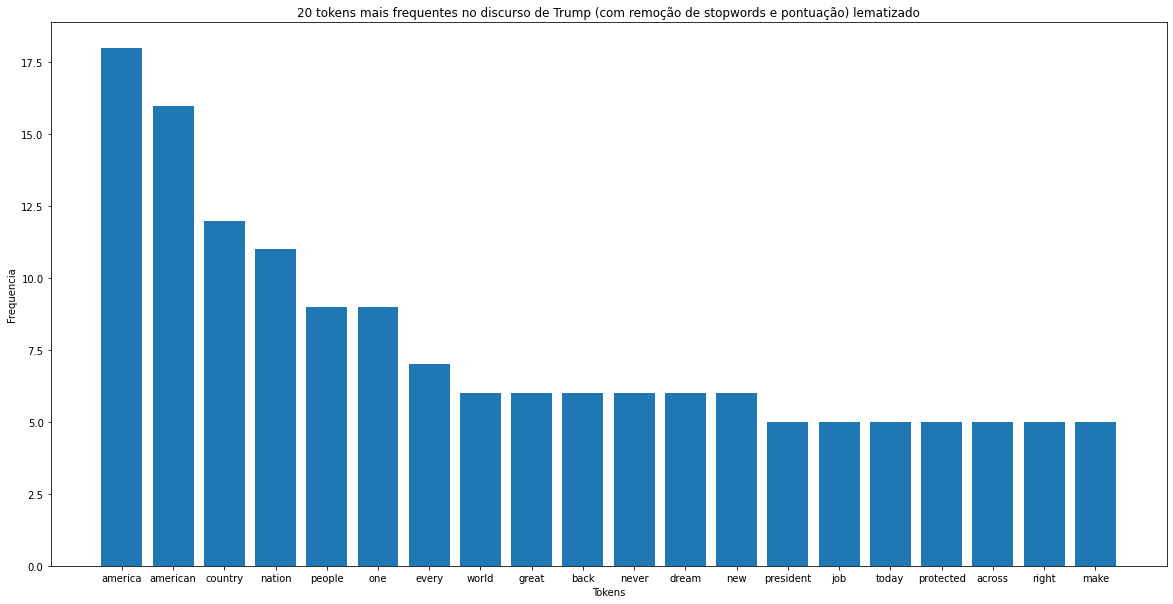

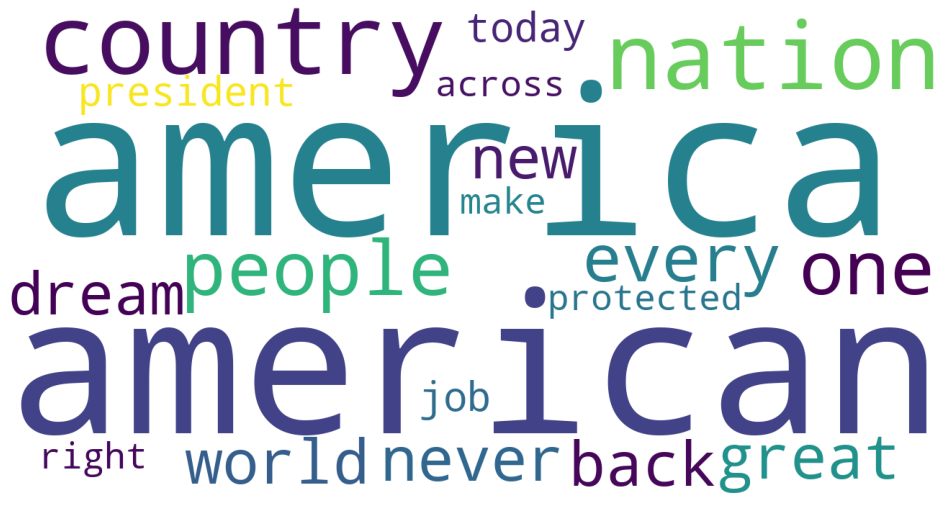

In [21]:
title = "20 tokens mais frequentes no discurso de Trump (com remoção de stopwords e pontuação) lematizado"
generate_histogram(title, word_frequency_t2_lem)
generate_wordcloud(STOPWORDS, word_frequency_t2_lem)

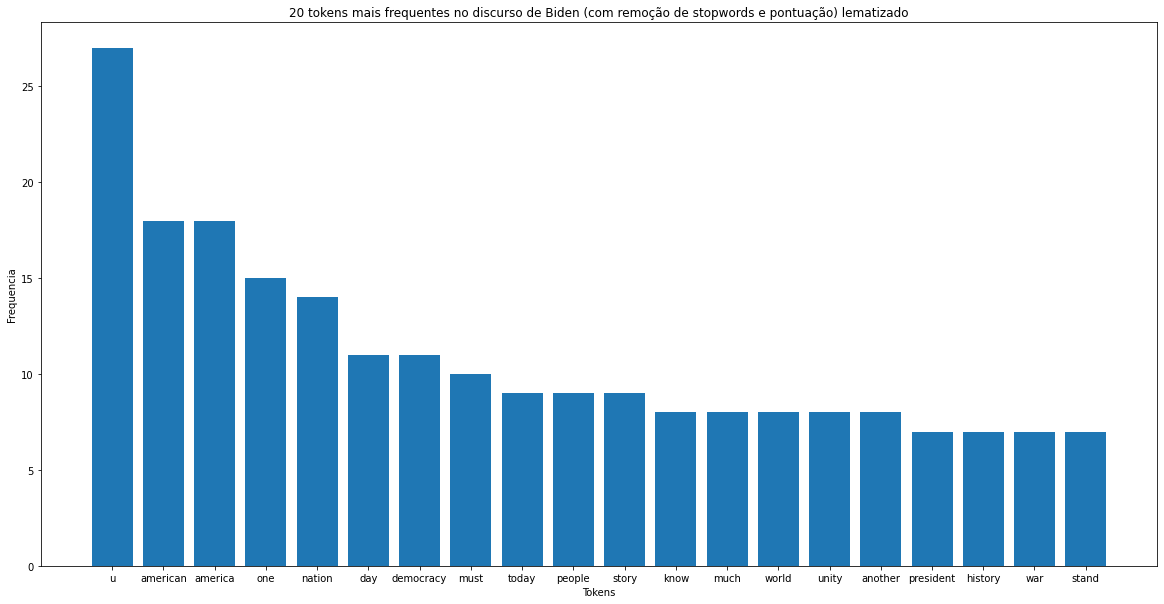

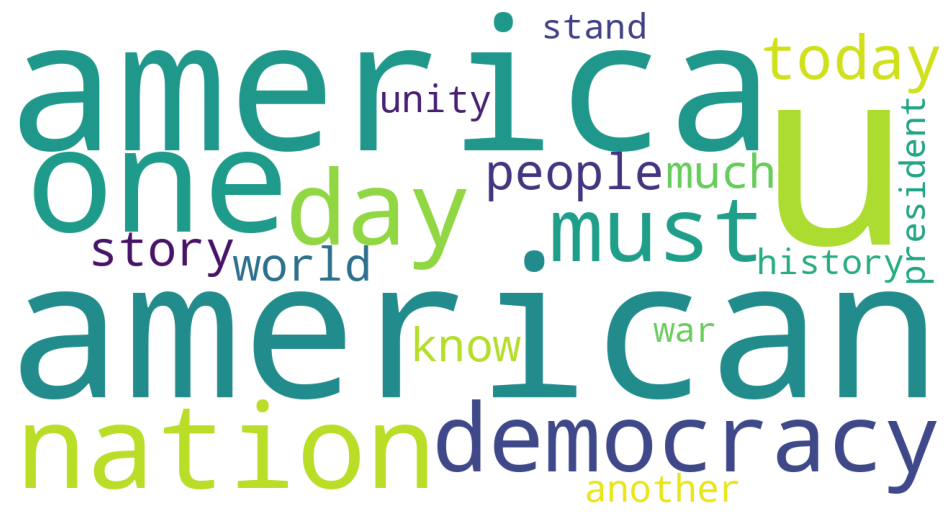

In [22]:
title = "20 tokens mais frequentes no discurso de Biden (com remoção de stopwords e pontuação) lematizado"
generate_histogram(title, word_frequency_b2_lem)
generate_wordcloud(STOPWORDS, word_frequency_b2_lem)

<h1>Passo e) Normalização com Stemming</h1>

Como no passo d), definimos os métodos get_stems() e stem_text():
<ul>
    <li>get_stems() gera o stem de uma única palavra</li>
    <li>stem_text() faz o stemming de todas as palavras de um texto</li>
</ul>
Neste passo, repetimos os processos do passo b) e do passo c) como fizemos no passo anterior, utilizando os métodos abaixo antes de realizar a tokenização dos textos.

In [23]:
def get_stems(word):
    stemmer = stem.PorterStemmer()
    return stemmer.stem(word)

def stem_text(text):
    return ' '.join([get_stems(word) for word in text.split()])

<h2>Repetindo o processo do passo b) (stemming sem utilizar o método normalize)</h2>

In [24]:
speech_trump_stem = stem_text(speech_trump)
word_frequency_t1_stem = get_frequencies(word_tokenize(speech_trump_stem))
print("20 tokens mais frequentes no discurso de Trump (Passo b) após stemming):\n")
print(word_frequency_t1_stem)

print("\n")

speech_biden_stem = stem_text(speech_biden)
word_frequency_b1_stem = get_frequencies(word_tokenize(speech_biden_stem))
print("20 tokens mais frequentes no discurso de Biden (Passo b) após stemming):\n")
print(word_frequency_b1_stem)

20 tokens mais frequentes no discurso de Trump (Passo b) após stemming):

[(',', 95), ('.', 86), ('and', 74), ('the', 70), ('we', 49), ('of', 48), ('our', 48), ('will', 40), ('to', 37), ('is', 21), ('america', 18), ('a', 15), ('for', 15), ('are', 14), ('in', 14), ('it', 14), ('nation', 13), ('but', 13), ('american', 13), ('you', 12)]


20 tokens mais frequentes no discurso de Biden (Passo b) após stemming):

[('.', 204), (',', 147), ('the', 101), ('and', 96), ('we', 91), ('of', 76), ('to', 65), ('a', 46), ('our', 43), ('in', 42), ('will', 34), ('for', 33), ('thi', 32), ('i', 32), ('is', 29), ('us', 27), ('’', 26), ('that', 26), ('not', 24), ('be', 21)]


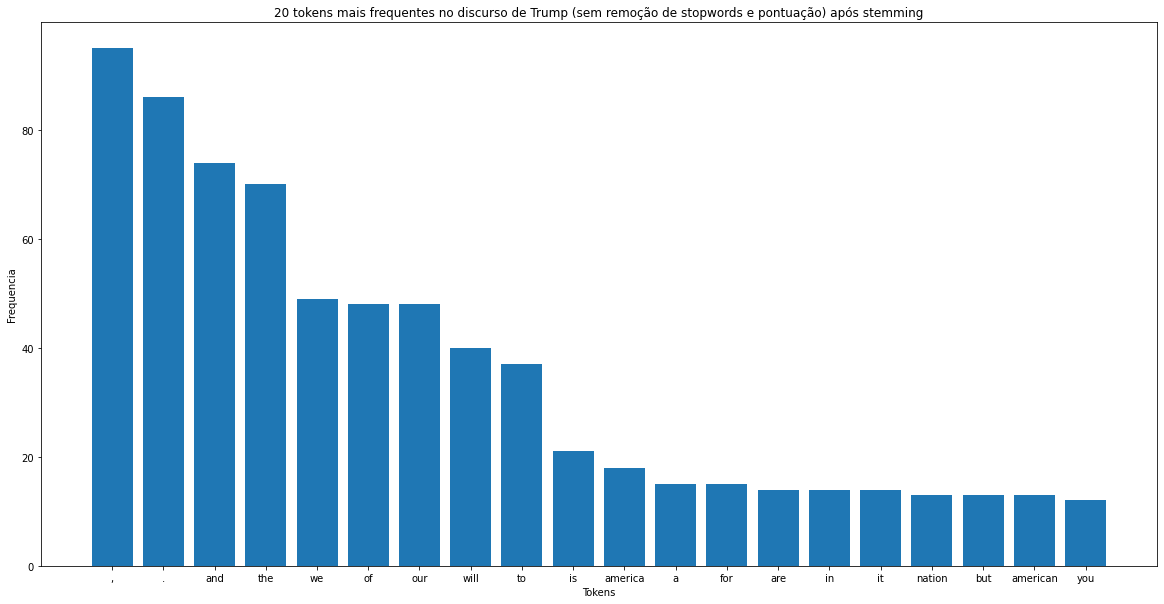

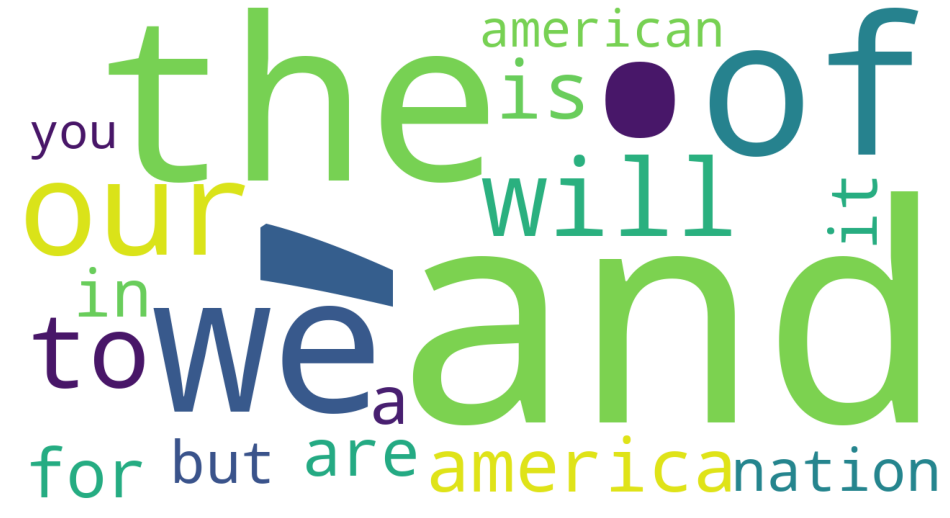

In [25]:
title = "20 tokens mais frequentes no discurso de Trump (sem remoção de stopwords e pontuação) após stemming"
generate_histogram(title, word_frequency_t1_stem)
generate_wordcloud(None, word_frequency_t1_stem)

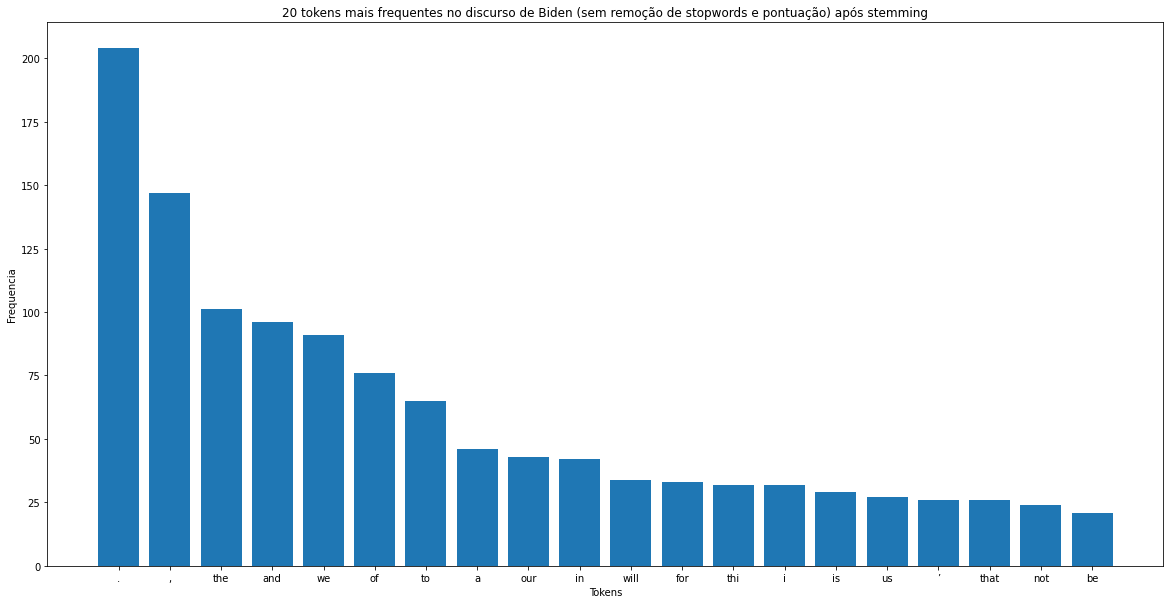

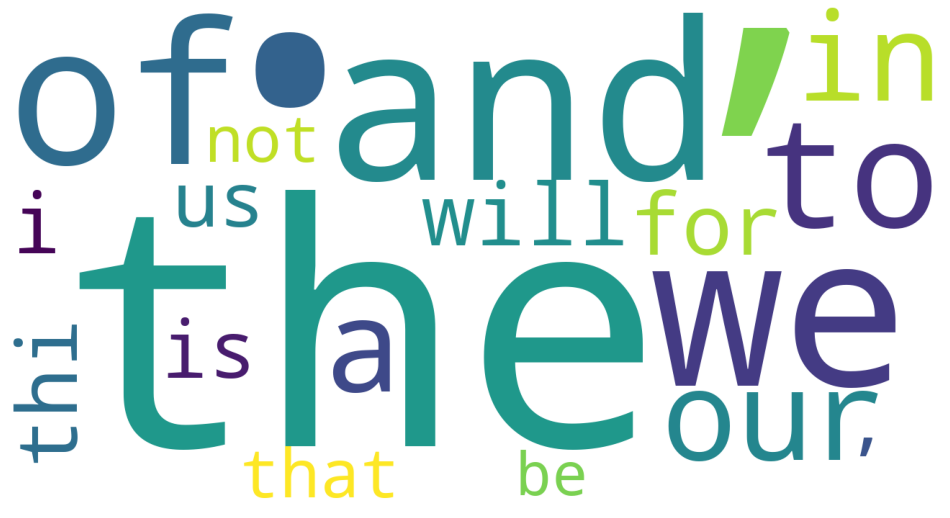

In [26]:
title = "20 tokens mais frequentes no discurso de Biden (sem remoção de stopwords e pontuação) após stemming"
generate_histogram(title, word_frequency_b1_stem)
generate_wordcloud(None, word_frequency_b1_stem)

<h2>Repetindo o processo do passo c) (stemming utilizando o método normalize)</h2>

In [27]:
speech_trump_norm_stem = stem_text(normalize(speech_trump))
word_frequency_t2_stem = get_frequencies(word_tokenize(speech_trump_norm_stem))
print("20 tokens mais frequentes no discurso de Trump (Passo c) após stemming):\n")
print(word_frequency_t2_stem)

print("\n")

speech_biden_norm_stem = stem_text(normalize(speech_biden))
word_frequency_b2_stem = get_frequencies(word_tokenize(speech_biden_norm_stem))
print("20 tokens mais frequentes no discurso de Biden (Passo c) após stemming):\n")
print(word_frequency_b2_stem)

20 tokens mais frequentes no discurso de Trump (Passo c) após stemming):

[('america', 18), ('american', 16), ('nation', 13), ('countri', 12), ('peopl', 9), ('one', 9), ('everi', 7), ('protect', 7), ('world', 6), ('great', 6), ('back', 6), ('never', 6), ('dream', 6), ('new', 6), ('make', 6), ('presid', 5), ('job', 5), ('today', 5), ('across', 5), ('right', 5)]


20 tokens mais frequentes no discurso de Biden (Passo c) após stemming):

[('us', 27), ('american', 18), ('america', 18), ('nation', 16), ('one', 15), ('day', 11), ('democraci', 11), ('must', 10), ('today', 9), ('peopl', 9), ('stori', 9), ('know', 8), ('much', 8), ('world', 8), ('uniti', 8), ('anoth', 8), ('presid', 7), ('histori', 7), ('war', 7), ('stand', 7)]


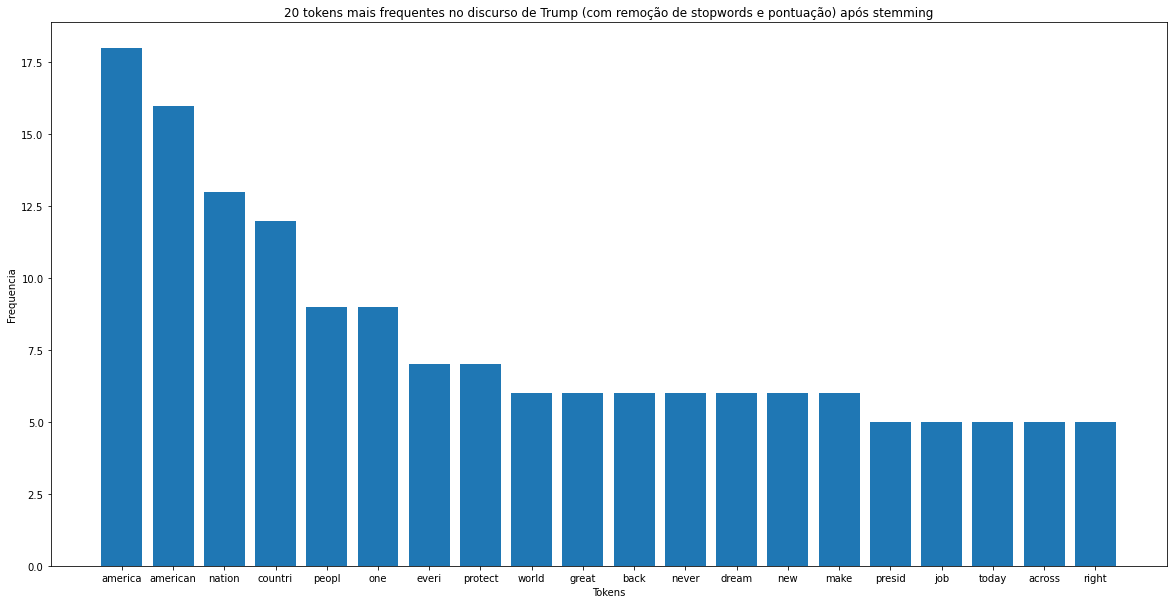

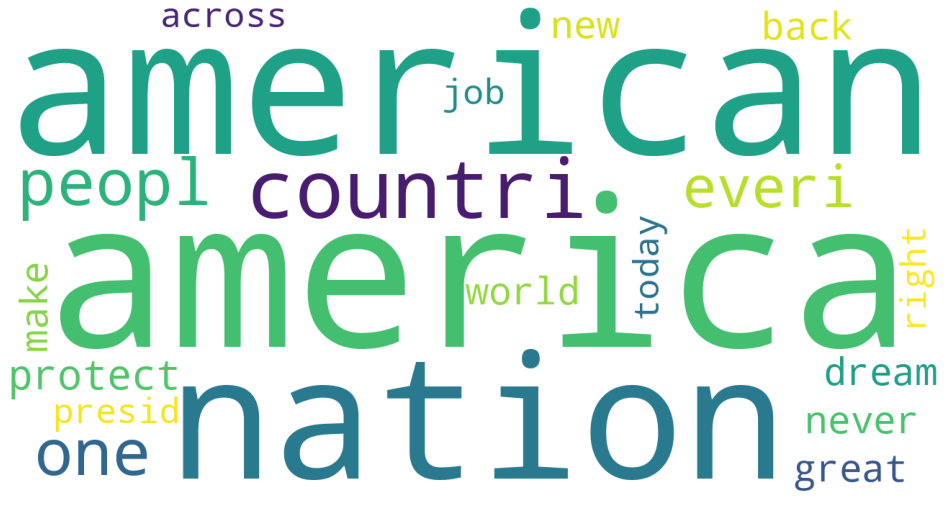

In [28]:
title = "20 tokens mais frequentes no discurso de Trump (com remoção de stopwords e pontuação) após stemming"
generate_histogram(title, word_frequency_t2_stem)
generate_wordcloud(STOPWORDS, word_frequency_t2_stem)

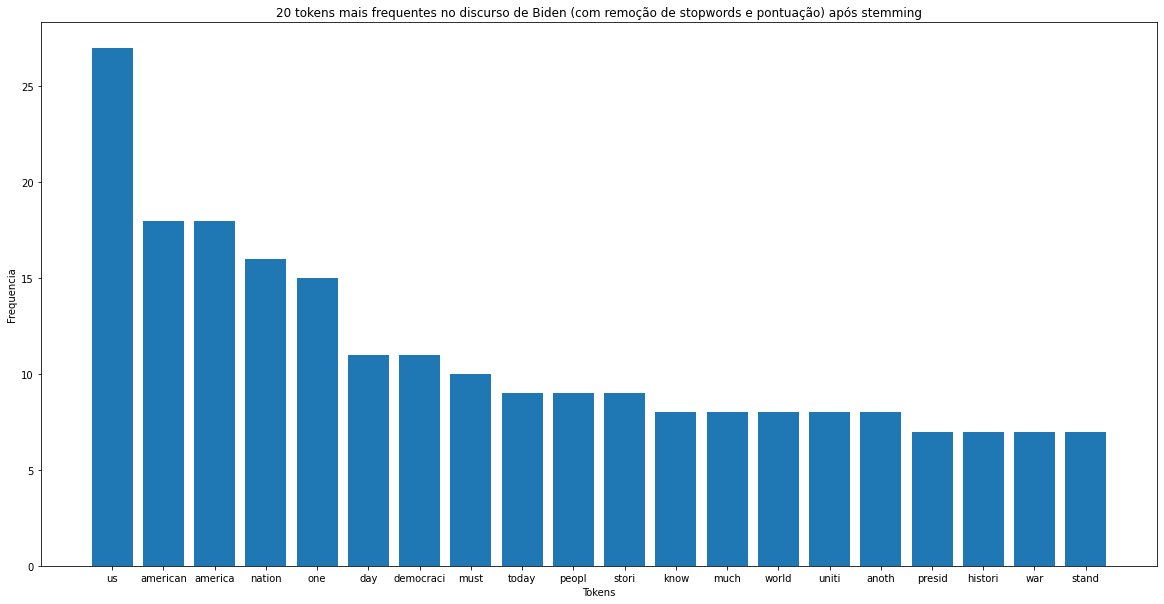

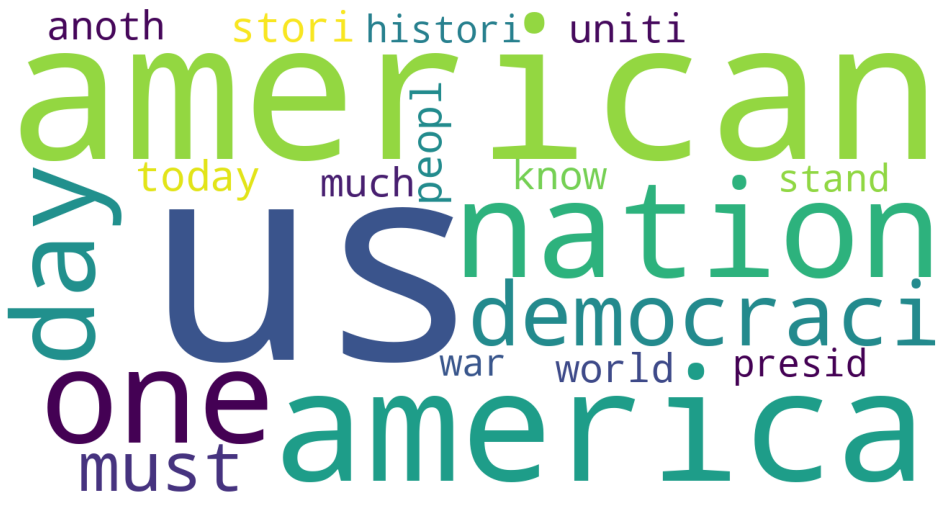

In [29]:
title = "20 tokens mais frequentes no discurso de Biden (com remoção de stopwords e pontuação) após stemming"
generate_histogram(title, word_frequency_b2_stem)
generate_wordcloud(STOPWORDS, word_frequency_b2_stem)